# MLG: Lab SOM (Part 1)

Throughout the laboratories, questions that you should try to answer are highlighted as follows :

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Try to answer these questions / run the proposed experiments for your own comprehension. </p>


## Introduction

In this laboratory, we will work with a different type of problem called unsupervised learning.
When we talk about unsupervised learning, it means that we are trying to find **hidden structure** in unlabeled data. Therefore, no simple measure exists to evaluate a potential solution.


We will focus on a commonly used algorithm to solve this kind of problem called "Self Organizing Maps".
As you saw in the theoretical part of the course, the main advantage of this algorithm is its topological ordering, which means that the maps can be visualized as **elastic grids**. Therefore they can be easily plotted.

## Pre-requisites

For the following exercises, you could need several new packages. Install them as follows:

    $ pip install seaborn
    
After these, you should be able to import them. If any error occurs after, it maybe because some modules are missing. Try to install them with:

    $ conda install name_of_the_missing_module

## Exercise 1 : Animals database clustering with Kohonen Self-Organizing Maps

### Dataset information

In the general sense, the Self-Organizing Maps algorithm is used as a dimensionality reduction algorithm. It transforms a "n-dimensional" data into a 2-dimensional elastic grid.

In this particular exercise, we will look at an example from the course: applying SOM on animals data.

Each row is an animal, and is constructed by the presence (1) or absence (0) of 13 different attributes. You can look at the plot hereafter, or generate it yourself with this code:

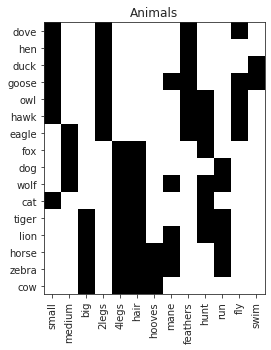

In [2]:
import KohonenUtils
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import cm
import matplotlib.patches as mpatches
import math
%matplotlib inline

matrix = np.array([[1,0,0,1,0,0,0,0,1,0,0,1,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,1],
                   [1,0,0,1,0,0,0,1,1,0,0,1,1],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,0,1,1,0,0,0,1,0,0,0],
                   [0,1,0,0,1,1,0,0,0,0,1,0,0],
                   [0,1,0,0,1,1,0,1,0,1,1,0,0],
                   [1,0,0,0,1,1,0,0,0,1,0,0,0],
                   [0,0,1,0,1,1,0,0,0,1,1,0,0],
                   [0,0,1,0,1,1,0,1,0,1,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,0,0,0,0,0,0]])

animals = pd.DataFrame(matrix.astype(float),columns=['small', 'medium', 'big', '2legs', '4legs', 'hair', 'hooves',
                                'mane', 'feathers', 'hunt', 'run', 'fly', 'swim'])

animals.index = ['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox',
                 'dog', 'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow']

pl.figure(figsize=(5,5))
pl.xticks(np.arange(matrix.shape[1]), animals.columns, rotation=90)
pl.yticks(np.arange(matrix.shape[0]), animals.index)
pl.title('Animals')
_ = pl.imshow(matrix, interpolation='nearest', cmap=cm.binary)

This is the features on which we will run our SOM algorithm in order to find an inherent data structure, or similarities between samples.

### Definition of the problem

In this problem, we will apply the SOM algorithm as follows:
    
1. Initialize SOM with its parameters (such as size of the map, neighborood size, learning rate...)
2. Sequentially present a random sample animal for the map to learn
3. Repeat step 2 until the whole dataset was learned t times

After the SOM has been "trained", we can then visualize it by plotting its U-Matrix (also known as Unified Distance Matrix) which shows the neurons and the distance with their neighbors.
To construct a U-Matrix, we need to:

1. Create a cell for each neuron
2. Create a cell for each 1-1 connection between two neurons
3. Assign these new cells the distance between the two neurons they connect (higher is further apart)

In the end, if we have a very simple SOM (2x2):

    Neuron(0) - Neuron(1)
       |           |
    Neuron(2) - Neuron(4)

The corresponding U-Matrix (2\*2 -1=3, 2\*2 -1=3) will be:

    Neuron(0) - Dist(0,1) - Neuron(1)
       |           |           |
    Dist(0,2) -  ?????    - Dist(1,3)
       |           |           |
    Neuron(2) - Dist(2,3) - Neuron(3)
    

We are only going to plot the distances.

Let us present the animal dataset 10 times to a newly generated kohonen map. We can then compute its U-matrix and plot the result.

### First tests with SOM and U-Matrix

/home/jael/Cours/MLG/Laboratoires/5 - Apprentissage non-supervisé/src/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


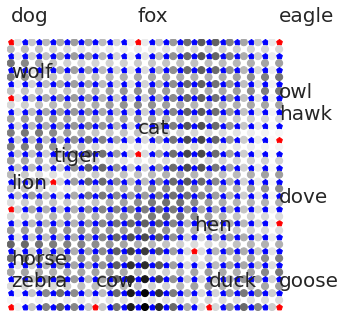

In [4]:
kmap = KohonenUtils.KohonenMap(20,
                               20,
                               size_vector=len(animals.columns))
n_iter = 10
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(animals.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

kmap.train(animals.values, np.array(animals.index), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(plot_names=True, plot_empty=True, fontsize=20)

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Analyze the code (in KohonenUtils.py) to understand what are the uses of each block in the cell right above.</p>

On crée `kmap` avec la méthode `KohonenMap()`. On lui passe 3 paramètres : le nombre de lignes, le nombre de colonnes, et la taille du vecteur. Le nombre de lignes et de colonnes correspond aux "points" bleus et rouges que l'on voit dans le graphe. Le taille du vecteur correspond au nombre de caractéristiques définissant les animaux.
On choisi ensuite des caractérisque d'apprentissage. On entraîne la SOM puis on l'affiche avec la `U-Matrix`.

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What do you think about the clustering quality ? </p>

On constate qu'il y a une frontière verticale relativement nette au 2/3 de la matrice. Elle sépare le groupe "oiseau" (sur la droite) du reste des animaux. On peut ensuite voir que le cheval et le zèbre ont un groupe séparé des autres. Comme ces deux animaux se ressemble, cela semble correct. La vache est plutôt seule dans son groupe. Pour les autres animaux, ils ont des groupements pas forcément cohérent.
Globalement, le groupement effectué est efficace. Il sépare bien les animaux entre eux, entre animaux qui se "ressemble", notamment les oiseaux du reste.

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: We plotted the U-Matrix in the previous cell. What does it represent ? </p>

Elle représente les "distances" entre les animaux. Ces distances représentent les liens de ressemblance d'après les critères données dans la matrice `animals`.

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What do the small stars represent ? What do the bigger circles represent ? </p>

Les étoiles représentent les neurones.
Les ronds en échelle de gris correspondent à la distance entre les étoiles bleues/rouges.

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What does the color in the big circles mean ? </p>

Plus un point est foncé, plus on a une frontière entre les différents animaux. Plus un point est clair, plus les animaux se ressemblent.

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What does the color in the small stars mean ? </p>

Les étoiles rouges représentent les animaux. Les étoiles bleues représentent rien. Ce sont des neurones inutilisés, car il y a plus de neurones que d'animaux.

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Plot the learning rate and the neighborhood size. Why do you think we choose them like this? </p>

Learning rate :



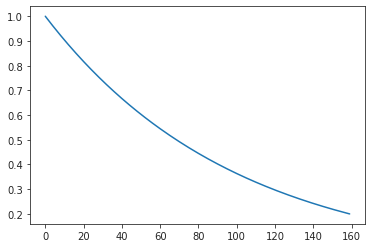

In [20]:
print("Learning rate :\n")
learning_rate.plot()


Neighborhood size :



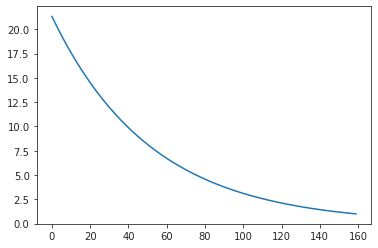

In [21]:
print("\nNeighborhood size :\n")
neighborhood_size.plot()

???

## Exercise 2 : Animals database clustering with K-Means

Now, lets try K-means as a means for clustering the animals. You need to install sklearn first and then run the next cell. 

In [100]:
### from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=10, init='k-means++').fit(animals.values)
print (animals.index,kmeans.labels_)

Index(['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox', 'dog',
       'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow'],
      dtype='object') [0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 1]


<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Observe the animals that are grouped together by K-Means and try different numbers of clusters: K=2,3,4, etc. </p>

Avec K=2, on a le plus souvent une séparation entre les oiseaux (dove, hen, duck, goose, owl, hawk, eagle) et le reste.

Avec K=3, on a souvent une séparation entre les oiseaux, puis deux groupes séparés aléatoirement.

Avec K=4, l'algorithme commence à tenter de séparer les oiseaux entre eux.

Avec K>4, on n'arrive plus à distinguer de tendance. Les groupes sont plus ou moins toujours différents.

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: n_init is a parameter that automatically asks K-means to try different cluster initializations and selects the best result. init='random' asks K-means to randomly initialize the cluster centroids. Please, try init=’k-means++’ and modify n_init to 10 for example and observe the results. </p>

Nous avons là toujours le même résultat. Un premier groupe contenant les oiseaux (dove, hen, duck, goose, owl, hawk, eagle), un deuxième groupe contenant des quadripèdes relativement petits (fox, dog, wolf, cat), puis un dernier groupe contenant des quadripèdes plus grand (tiger, lion, horse, zebra, cow).

## Exercice 3 : Wine database clustering with K-Means

Now, use the K-means algorithm to separate the three types of wine in the Wine dataset (K = 3).

In [274]:
from sklearn.datasets import load_wine

data = load_wine()
features = data.data
classes = data.target
classes_names = data.target_names

In [283]:
kmeans = KMeans(n_clusters=3,n_init=10, init='k-means++').fit(features)

In [284]:
print(kmeans.labels_)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


In [131]:
wines = pd.DataFrame(np.array(features), columns=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', '% of diluted wines', 'Proline'])
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Observe the observations that are grouped together by K-Means. </p>

La classe 0 est bien représentée avec le K-Means. On voit qu'il y a peu d'autre classes qui sont catégorisés comme de cette classe, et il n'y a qu'un seul vin qui n'est pas classe 0 et qui est défini comme tel. Par contre, pour les classes 1 et 2, c'est plus ou moins aléatoire. On voit quand même une légère séparation entre les deux classes.

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Count the number of "bottles" that are correctly grouped. What is the accuracy of this unsupervised classification? </p>

In [285]:
def count_correct_values(data_to_test):
    correct = 0

    _, count = np.unique(classes, return_counts=True)
    nb_class_0 = count[0]
    nb_class_1 = count[1]
    nb_class_2 = count[2]

    for i in range(nb_class_0):
        if classes[i] == data_to_test[i]:
            correct += 1

    for i in range(nb_class_0, nb_class_0 + nb_class_1):
        if classes[i] == 1 and data_to_test[i] == 2:
            correct += 1

    for i in range(nb_class_0 + nb_class_1, nb_class_0 + nb_class_1 + nb_class_2):
        if classes[i] == 2 and data_to_test[i] == 1:
            correct += 1
    
    return correct

In [286]:
correct = count_correct_values(kmeans.labels_)

print("Bouteilles correctement classées : ")
print(correct)
print("Accuracy :")
print(correct / len(kmeans.labels_) * 100)

Bouteilles correctement classées : 
125
Accuracy :
70.2247191011236


<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Try to improve the performance of the classification. Does normalizing the data increases the accuracy? Does selecting a reduced number of features improves the accuracy? Why?. </p>

In [216]:
from sklearn import preprocessing

for i in range(13):
    normalized_features = preprocessing.normalize(features)

In [321]:
kmeans_norm = KMeans(n_clusters=3,n_init=10, init='k-means++').fit(normalized_features)
print(kmeans_norm.labels_)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 2 2 1 1 1 1 2 0 2 1 1
 0 2 2 2 1 2 2 0 1 1 1 2 1 1 0 0 1 1 1 2 2 1 2 1 1 2 1 1 2 2 1 2 1 1 2 1 1
 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 2 2 2 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [322]:
correct = count_correct_values(kmeans_norm.labels_)

print("Bouteilles correctement classées après normalisation : ")
print(correct)
print("Accuracy :")
print(correct / len(kmeans.labels_) * 100)

Bouteilles correctement classées après normalisation : 
124
Accuracy :
69.66292134831461


In [330]:
features_reduce = data.data[:,:5]
classes_reduce = data.target
classes_names_reduce = data.target_names

In [332]:
kmeans_reduce = KMeans(n_clusters=3,n_init=10, init='k-means++').fit(features_reduce)
print(kmeans_norm.labels_)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 2 2 1 1 1 1 2 0 2 1 1
 0 2 2 2 1 2 2 0 1 1 1 2 1 1 0 0 1 1 1 2 2 1 2 1 1 2 1 1 2 2 1 2 1 1 2 1 1
 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 2 2 2 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [334]:
correct = count_correct_values(kmeans_reduce.labels_)

print("Bouteilles correctement classées avec seulement 5 paramètres : ")
print(correct)
print("Accuracy :")
print(correct / len(kmeans.labels_) * 100)

Bouteilles correctement classées avec seulement 5 paramètres : 
86
Accuracy :
48.31460674157304
